In [1]:
from keras.layers import Flatten, Dense, Dropout,Input
from keras.applications import resnet50
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import tensorflow as tf
import numpy as np
import pickle

D:\application\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open('../data/train_rgb.pkl', 'rb') as f:
    X_train, Y_train = pickle.load(f)

In [3]:
print(X_train.shape)
print(Y_train.shape)

(33401, 64, 64, 3)
(33401, 5, 11)


In [4]:
X_tiny = X_train[:10]
Y_tiny = Y_train[:10]
del X_train,Y_train

In [5]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


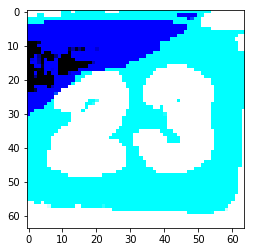

In [6]:
plt.imshow(X_tiny[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


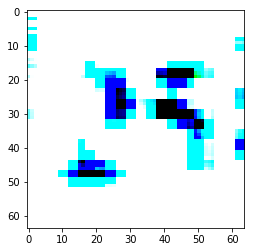

In [7]:
plt.imshow(X_tiny[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


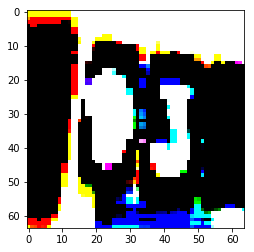

In [8]:
plt.imshow(X_tiny[3])

做了减去均值的预处理，显示图片得加上那个均值。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


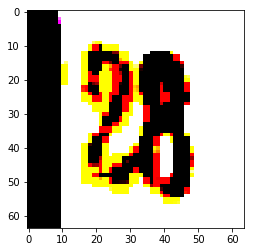

In [9]:
plt.imshow(X_tiny[6])

In [ ]:
single_true_cnt = 0
multi_true_cnt = 0
probs = np.array(probs)
Y_train = np.array(Y_train)
n_samples = Y_train.shape[0]
# print(np.equal(Y_train[i],probs[i]))
for i in range(n_samples):
    pred_digits = np.argmax(Y_train[i],axis = 1)
    true_digits = np.argmax(probs[i],axis = 1)
    single_true_cnt += np.sum(np.equal(pred_digits,true_digits).astype('uint8'))
    multi_true_cnt += np.equal(pred_digits,true_digits).all().astype('uint8') #all判断全部相等
print(single_true_cnt)
print(multi_true_cnt)

In [ ]:
for i in range(n_samples):
    print('-----')
    print(np.argmax(Y_train[i],axis = 1))
    print(np.argmax(probs[i],axis = 1))